In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy
import numpy as np
import torch
torch.manual_seed(12)
torch.cuda.manual_seed(12)
torch.cuda.manual_seed_all

dtype = torch.float
device = torch.device("cuda:0")


In [2]:
import sys

In [3]:
sys.path.append('/u/wangnisn/devel/machine_learning_kinetics/ml_kinetics')

In [4]:
from mlk import learning

# Set up model

In [5]:
vortex = {'eqn_type':'vortex',
        'fcn':'exp(-1/2*(x-cos(t))**2-1/2*(y-sin(t))**2)',
        'domain':{'x':[-2,2],'y':[-2,2],'t':[0,2]},
        
        'err_vec':[0,0,0,1,-1,0,0]}

u_t,u_x,u_y,u,x,y = sympy.symbols('u_t u_x u_y u x y')

dictionary = (u_x,u_y,x*u_x,y*u_x,x*u_y,y*u_y,u)
vortex['dictionary'] = dictionary
pde = vortex
domain =pde['domain']
fcn = pde['fcn']
n_points = 50000
x = sympy.symbols([x for x in domain.keys()])
u_exact = sympy.lambdify(x,sympy.sympify(fcn),'numpy')
inputs = {}
for key in domain.keys():
    min_d = domain[key][0]
    max_d = domain[key][1]
    #iputs[key] = ((max_d-min_d)*torch.rand((n_points,1),device=device,dtype=dtype,requires_grad=True)+min_d)
    tt = np.random.uniform(min_d,max_d,(n_points,1))
    inputs[key] = torch.tensor(tt,device=device,dtype=dtype,requires_grad=True)
u_exact = sympy.lambdify(x,sympy.sympify(fcn),'numpy')
u = u_exact(*[i.detach().cpu() for i in inputs.values()])
pde = {}
u = u.type(dtype).to(device)
pde['inputs'] = inputs

In [6]:
params = {'n_epochs':10000,
          'alpha_pde_start':1,
           'alpha_pde_end':1,
           'alpha_l1':1e-5, 
          'warmup_nsteps':500,
          'linearRegInterval':5,
          'linearRegression':False,
          'width':50,
          'layers':8,
          'lr':0.002,
          'update_coef_in_dl':True,
          'logfile':'fixed_alpha_no_lasso.txt'}

model = learning(inputs=inputs, u=u, dictionary=dictionary,**params)


Epoch:    0,  Loss u: 1.376e-01, Loss pde: 9.807e-04, Loss_norm: 7.488e+00, Loss tot: 1.376e-01
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:   50,  Loss u: 1.573e-02, Loss pde: 3.447e-01, Loss_norm: 7.488e+00, Loss tot: 1.573e-02
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:  100,  Loss u: 2.357e-03, Loss pde: 9.132e-01, Loss_norm: 7.488e+00, Loss tot: 2.357e-03
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:  150,  Loss u: 1.290e-03, Loss pde: 9.376e-01, Loss_norm: 7.488e+00, Loss tot: 1.290e-03
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:  200,  Loss u: 1.007e-03, Loss pde: 9.301e-01, Loss_norm: 7.488e+00, Loss tot: 1.007e-03
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00  

Epoch: 2050,  Loss u: 1.855e-04, Loss pde: 1.008e-04, Loss_norm: 1.773e+00, Loss tot: 3.041e-04
  coefs:  3.1069e-01   -1.9500e-01   -6.2745e-04    6.2324e-01   -6.4102e-01   -2.0839e-03   -2.2181e-04  
Epoch: 2100,  Loss u: 1.676e-04, Loss pde: 9.905e-05, Loss_norm: 1.785e+00, Loss tot: 2.845e-04
  coefs:  2.9553e-01   -1.8463e-01   -1.8897e-03    6.4367e-01   -6.5899e-01   -1.8841e-04   -2.9216e-04  
Epoch: 2150,  Loss u: 1.527e-04, Loss pde: 9.753e-05, Loss_norm: 1.796e+00, Loss tot: 2.681e-04
  coefs:  2.8239e-01   -1.7609e-01   -1.8562e-03    6.6037e-01   -6.7495e-01    2.6040e-06   -2.0849e-04  
Epoch: 2200,  Loss u: 1.395e-04, Loss pde: 9.563e-05, Loss_norm: 1.806e+00, Loss tot: 2.532e-04
  coefs:  2.7022e-01   -1.6835e-01   -1.8442e-03    6.7554e-01   -6.8949e-01    1.4876e-04   -1.5638e-04  
Epoch: 2250,  Loss u: 1.305e-03, Loss pde: 5.523e-04, Loss_norm: 1.816e+00, Loss tot: 1.876e-03
  coefs:  2.5882e-01   -1.6169e-01   -1.7996e-03    6.8921e-01   -7.0321e-01    7.5164e-04  

Epoch: 4100,  Loss u: 2.575e-05, Loss pde: 3.624e-05, Loss_norm: 1.935e+00, Loss tot: 8.134e-05
  coefs:  9.4771e-02   -5.9229e-02   -1.0433e-05    8.8831e-01   -8.9162e-01    6.2750e-04    6.1659e-08  
Epoch: 4150,  Loss u: 2.368e-05, Loss pde: 3.518e-05, Loss_norm: 1.938e+00, Loss tot: 7.824e-05
  coefs:  8.9166e-02   -5.5553e-02    1.7405e-05    8.9481e-01   -8.9830e-01    5.5334e-04    4.6082e-06  
Epoch: 4200,  Loss u: 2.204e-05, Loss pde: 3.409e-05, Loss_norm: 1.941e+00, Loss tot: 7.554e-05
  coefs:  8.4422e-02   -5.2486e-02   -9.4028e-06    9.0023e-01   -9.0381e-01    4.7067e-04   -9.8486e-06  
Epoch: 4250,  Loss u: 3.208e-05, Loss pde: 3.595e-05, Loss_norm: 1.931e+00, Loss tot: 8.733e-05
  coefs:  9.5288e-02   -5.4849e-02    3.8374e-03    8.8301e-01   -8.8909e-01   -3.3627e-03    1.1628e-03  
Epoch: 4300,  Loss u: 2.369e-05, Loss pde: 3.154e-05, Loss_norm: 1.938e+00, Loss tot: 7.461e-05
  coefs:  8.7908e-02   -5.4567e-02   -2.0400e-05    8.9600e-01   -8.9934e-01    2.1859e-05  

Epoch: 6150,  Loss u: 9.763e-06, Loss pde: 1.164e-05, Loss_norm: 1.980e+00, Loss tot: 4.120e-05
  coefs:  2.9367e-02   -1.7619e-02    7.1316e-06    9.6542e-01   -9.6706e-01    5.9376e-05   -1.8690e-05  
Epoch: 6200,  Loss u: 4.945e-04, Loss pde: 3.176e-04, Loss_norm: 1.978e+00, Loss tot: 8.319e-04
  coefs:  2.8442e-02   -1.4410e-02    1.7828e-04    9.6593e-01   -9.6692e-01   -4.8440e-04    1.7309e-03  
Epoch: 6250,  Loss u: 1.285e-05, Loss pde: 1.246e-05, Loss_norm: 1.975e+00, Loss tot: 4.506e-05
  coefs:  3.5855e-02   -2.1679e-02    9.1636e-05    9.5857e-01   -9.5909e-01   -5.1801e-05   -5.5453e-05  
Epoch: 6300,  Loss u: 1.007e-05, Loss pde: 1.079e-05, Loss_norm: 1.979e+00, Loss tot: 4.065e-05
  coefs:  3.0594e-02   -1.8345e-02   -1.1130e-05    9.6425e-01   -9.6581e-01    2.1419e-04    2.0141e-05  
Epoch: 6350,  Loss u: 1.730e-04, Loss pde: 9.995e-05, Loss_norm: 1.970e+00, Loss tot: 2.927e-04
  coefs:  3.4239e-02   -1.8565e-02    3.3770e-03    9.5347e-01   -9.5634e-01   -3.5363e-03  

Epoch: 8200,  Loss u: 5.828e-06, Loss pde: 6.505e-06, Loss_norm: 1.989e+00, Loss tot: 3.222e-05
  coefs:  1.5362e-02   -9.0846e-03    1.4188e-05    9.8171e-01   -9.8264e-01    5.5722e-05    2.2549e-05  
Epoch: 8250,  Loss u: 5.557e-06, Loss pde: 6.469e-06, Loss_norm: 1.990e+00, Loss tot: 3.192e-05
  coefs:  1.3850e-02   -8.1336e-03   -8.2403e-05    9.8337e-01   -9.8425e-01    8.2924e-05   -5.2879e-05  
Epoch: 8300,  Loss u: 7.856e-06, Loss pde: 7.828e-06, Loss_norm: 1.988e+00, Loss tot: 3.557e-05
  coefs:  1.6852e-02   -1.0527e-02   -1.6969e-04    9.8003e-01   -9.8059e-01    1.1227e-04    7.8793e-06  
Epoch: 8350,  Loss u: 5.507e-06, Loss pde: 6.282e-06, Loss_norm: 1.989e+00, Loss tot: 3.168e-05
  coefs:  1.4766e-02   -8.7009e-03    4.8008e-05    9.8242e-01   -9.8327e-01    1.2784e-04   -4.8345e-05  
Epoch: 8400,  Loss u: 1.829e-05, Loss pde: 1.530e-05, Loss_norm: 1.980e+00, Loss tot: 5.338e-05
  coefs:  1.9166e-02   -1.0498e-02    7.3729e-04    9.7349e-01   -9.7494e-01   -7.2533e-05  

In [7]:
log = pd.read_csv('fixed_alpha_no_lasso.txt')

(-1.0, 1.0)

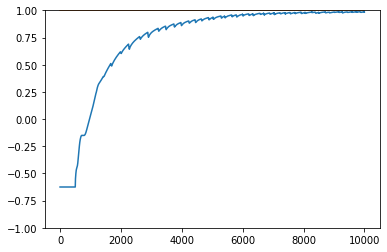

In [8]:
plt.plot(log['Epoch'].values, log['p3'].values)
plt.plot([0,10000],[1,1])
plt.ylim(-1,1)

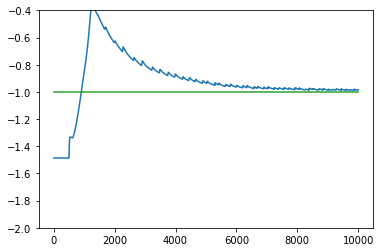

In [9]:
plt.plot(log['Epoch'], log['p4'])
plt.plot([0,10000],[1,1])
plt.ylim(-2,-0.4)
plt.plot([0,10000],[-1,-1])

(1200.0, 3000.0)

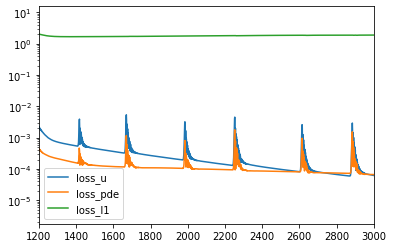

In [10]:
plt.semilogy(log['Epoch'], log['Loss_u'], label='loss_u')
plt.semilogy(log['Epoch'], log['Loss_pde'], label='loss_pde')
plt.semilogy(log['Epoch'], log['Loss_l1'], label='loss_l1')
plt.legend()
plt.xlim(1200,3000)

In [10]:
t_mesh = dt*np.arange(nsteps)
x_mesh = dx*np.arange(nx)
y_mesh = dy*np.arange(ny)
t_mesh, x_mesh,y_mesh = np.meshgrid(t_mesh, x_mesh, y_mesh,indexing='ij')
t_mesh = np.reshape(t_mesh, (-1,1))
x_mesh = np.reshape(x_mesh, (-1,1))
y_mesh = np.reshape(y_mesh, (-1,1))
x_mesh /= x_max
y_mesh /= y_max
t_mesh /= t_max
prediction = model(torch.cat([torch.tensor(x_mesh), torch.tensor(y_mesh), torch.tensor(t_mesh)],dim=1).double().cuda(0))